# Projet d'Analyse de Données Spotify 2023

Bienvenue dans ce projet d'analyse de données portant sur le top 1000 des chansons les plus écoutées dans le monde en 2023. Ce projet vise à construire un modèle de régression capable de prédire le nombre de streams d'une chanson en fonction de divers paramètres.

## Objectif du Projet

L'objectif principal est d'explorer le dataset "spotify-2023.csv" en utilisant des techniques de data analysis et de machine learning. Nous allons effectuer plusieurs étapes, de la préparation des données à la prédiction de streams pour de nouvelles entrées utilisateur.

## Les Étapes du Projet

1. **Data Preprocessing** : Nettoyage des données en éliminant les valeurs manquantes et les doublons.

2. **Feature Extraction** : Extraction des caractéristiques pertinentes pour notre modèle, telles que le mois de sortie, le BPM, la danceability, etc.

3. **Train-Test Split** : Division du dataset en ensembles d'entraînement et de test.

4. **Entrainement du Modèle** : Utilisation d'un modèle de régression RandomForest pour entraîner notre modèle.

5. **Évaluation du Modèle** : Évaluation de la performance du modèle sur l'ensemble de test.

6. **Hyper-parameter Tuning** : Optimisation des hyperparamètres du modèle pour améliorer ses performances.

7. **Nouvelle Prédiction** : Utilisation du modèle entraîné pour prédire le nombre de streams pour de nouvelles entrées utilisateur.

## Prérequis 

Avant de commencer, assurez-vous d'avoir installé les bibliothèques nécessaires telles que pandas, matplotlib, seaborn et scikit-learn.

```bash
pip install pandas matplotlib seaborn scikit-learn


In [85]:
# Import des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Chargement du dataset
dataframe = pd.read_csv("spotify-2023.csv", encoding='latin1')

# ## Data Preprocessing
# La première étape consiste à effectuer un prétraitement sur les données pour traiter les valeurs manquantes et supprimer les doublons.

In [86]:
# Data Preprocessing
def data_preprocessing(dataframe):
    # lignes avec des valeurs nulles
    dataframe.dropna(inplace=True)
    # doublons
    dataframe.drop_duplicates(inplace=True)
    return dataframe

dataframe = data_preprocessing(dataframe)

# ## Feature Extraction
# Dans cette étape, nous extrayons les caractéristiques (features) et la cible (target) du dataset.

In [87]:
numeric_columns = dataframe.select_dtypes(include='number').columns.tolist()
def feature_extraction(dataframe):
    y = dataframe["streams"]
    print(dataframe[numeric_columns].dtypes)
    X = dataframe[numeric_columns]
    
    return X, y

X, y = feature_extraction(dataframe)

artist_count            int64
released_year           int64
released_month          int64
released_day            int64
in_spotify_playlists    int64
in_spotify_charts       int64
in_apple_playlists      int64
in_apple_charts         int64
in_deezer_charts        int64
bpm                     int64
danceability_%          int64
valence_%               int64
energy_%                int64
acousticness_%          int64
instrumentalness_%      int64
liveness_%              int64
speechiness_%           int64
dtype: object


# Affichage des corrélations entre les caractéristiques et le nombre de streams

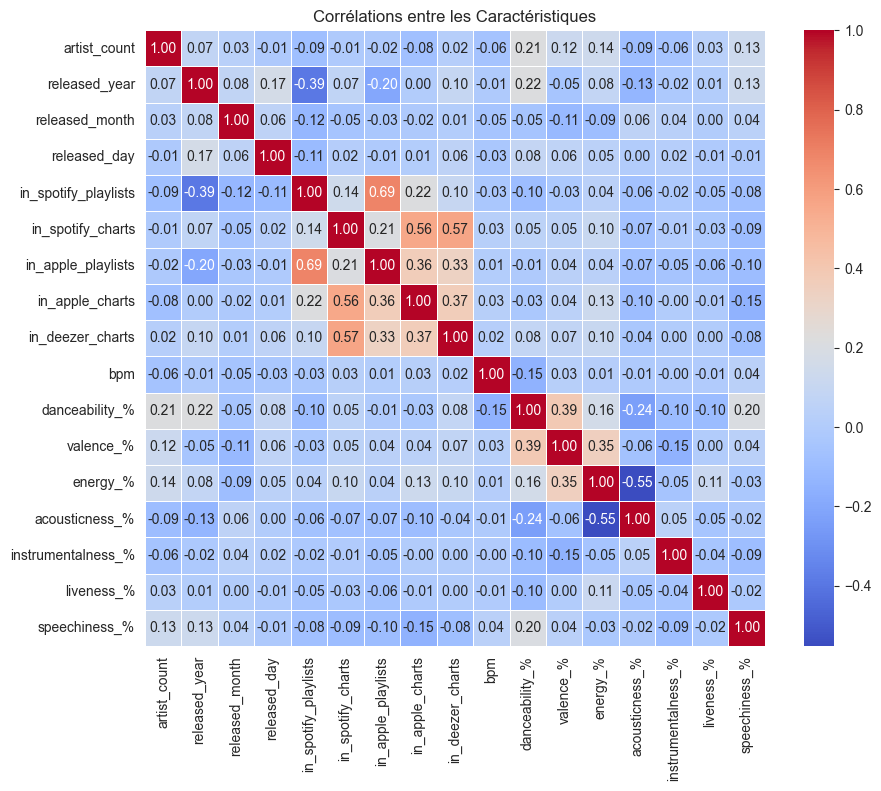

In [88]:
numeric_df = dataframe.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sb.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Corrélations entre les Caractéristiques')
plt.show()

# ## Train-Test Split
# Divisons le dataset en ensembles d'entraînement et de test.

In [89]:
def train_test_split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split_data(X, y)

# ## Entrainement du Modèle
# Utilisons un modèle de régression RandomForest pour entraîner notre modèle.

In [90]:
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=1)
    model.fit(X_train, y_train)
    return model

model = train_model(X_train, y_train)

# ## Évaluation du Modèle
# Évaluons la performance du modèle sur l'ensemble de test en utilisant la Mean Squared Error (MSE).

In [91]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

mse = evaluate_model(model, X_test, y_test)
print(f"Mean Squared Error : {mse}")

ValueError: could not convert string to float: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'